In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)
from scipy.ndimage import sobel
from scipy.ndimage import gaussian_filter

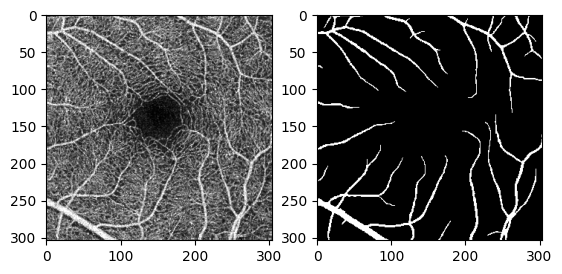

In [2]:
image = np.array(Image.open("/home/linus/Datasets/OCTA/OCTA-500/processed/images/10301.png"))
label = np.array(Image.open("/home/linus/Datasets/OCTA/OCTA-500/processed/segmentations/10301.png"))
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
ax1.imshow(image, cmap="gray")
ax2.imshow(label, cmap="gray")
image=image.astype(np.float32)/255

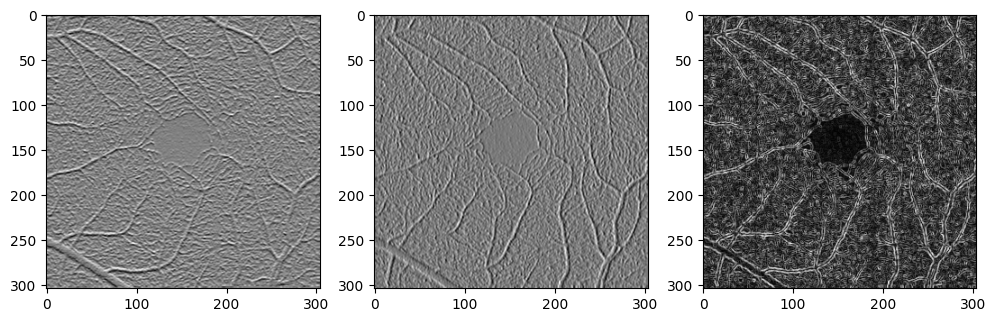

In [3]:
sobel_h = sobel(image, 0)  # horizontal gradient
sobel_v = sobel(image, 1)  # vertical gradient
magnitude = np.sqrt(sobel_h**2 + sobel_v**2)
magnitude -= magnitude.min()
magnitude /= magnitude.max()

fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,12))
plt.gray()  # show the filtered result in grayscale
ax1.imshow(sobel_h)
ax2.imshow(sobel_v)
ax3.imshow(magnitude)

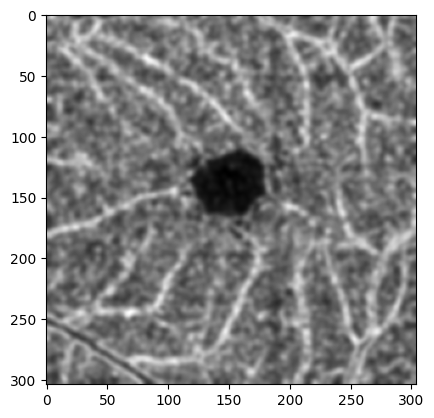

In [4]:
filtered_image = gaussian_filter(magnitude, sigma=2)
plt.imshow(filtered_image)

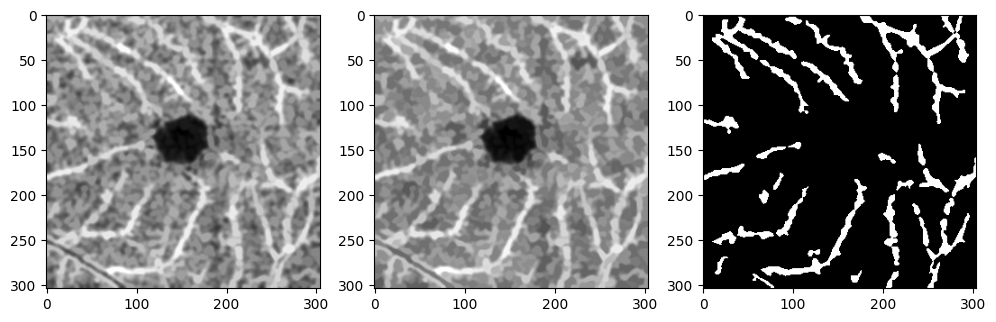

In [5]:
opened_image = area_opening(filtered_image, area_threshold=68, connectivity=1)
opened_image -= opened_image.min()
opened_image /= opened_image.max()
closed_image = area_closing(opened_image, area_threshold=86, connectivity=1)
closed_image -= closed_image.min()
closed_image /= closed_image.max()
t_image = closed_image.copy()
t_image[t_image<0.77]=0
t_image[t_image>0.77]=1
_, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,12))
ax1.imshow(opened_image)
ax2.imshow(closed_image)
ax3.imshow(t_image)